FileNotFoundError: [Errno 2] No such file or directory: '/home/heliya/Desktop/TextAttack-Search-Benchmark/res_csv/lstm_yelp/Textattack (LSTM YELP), Hownet.csv'

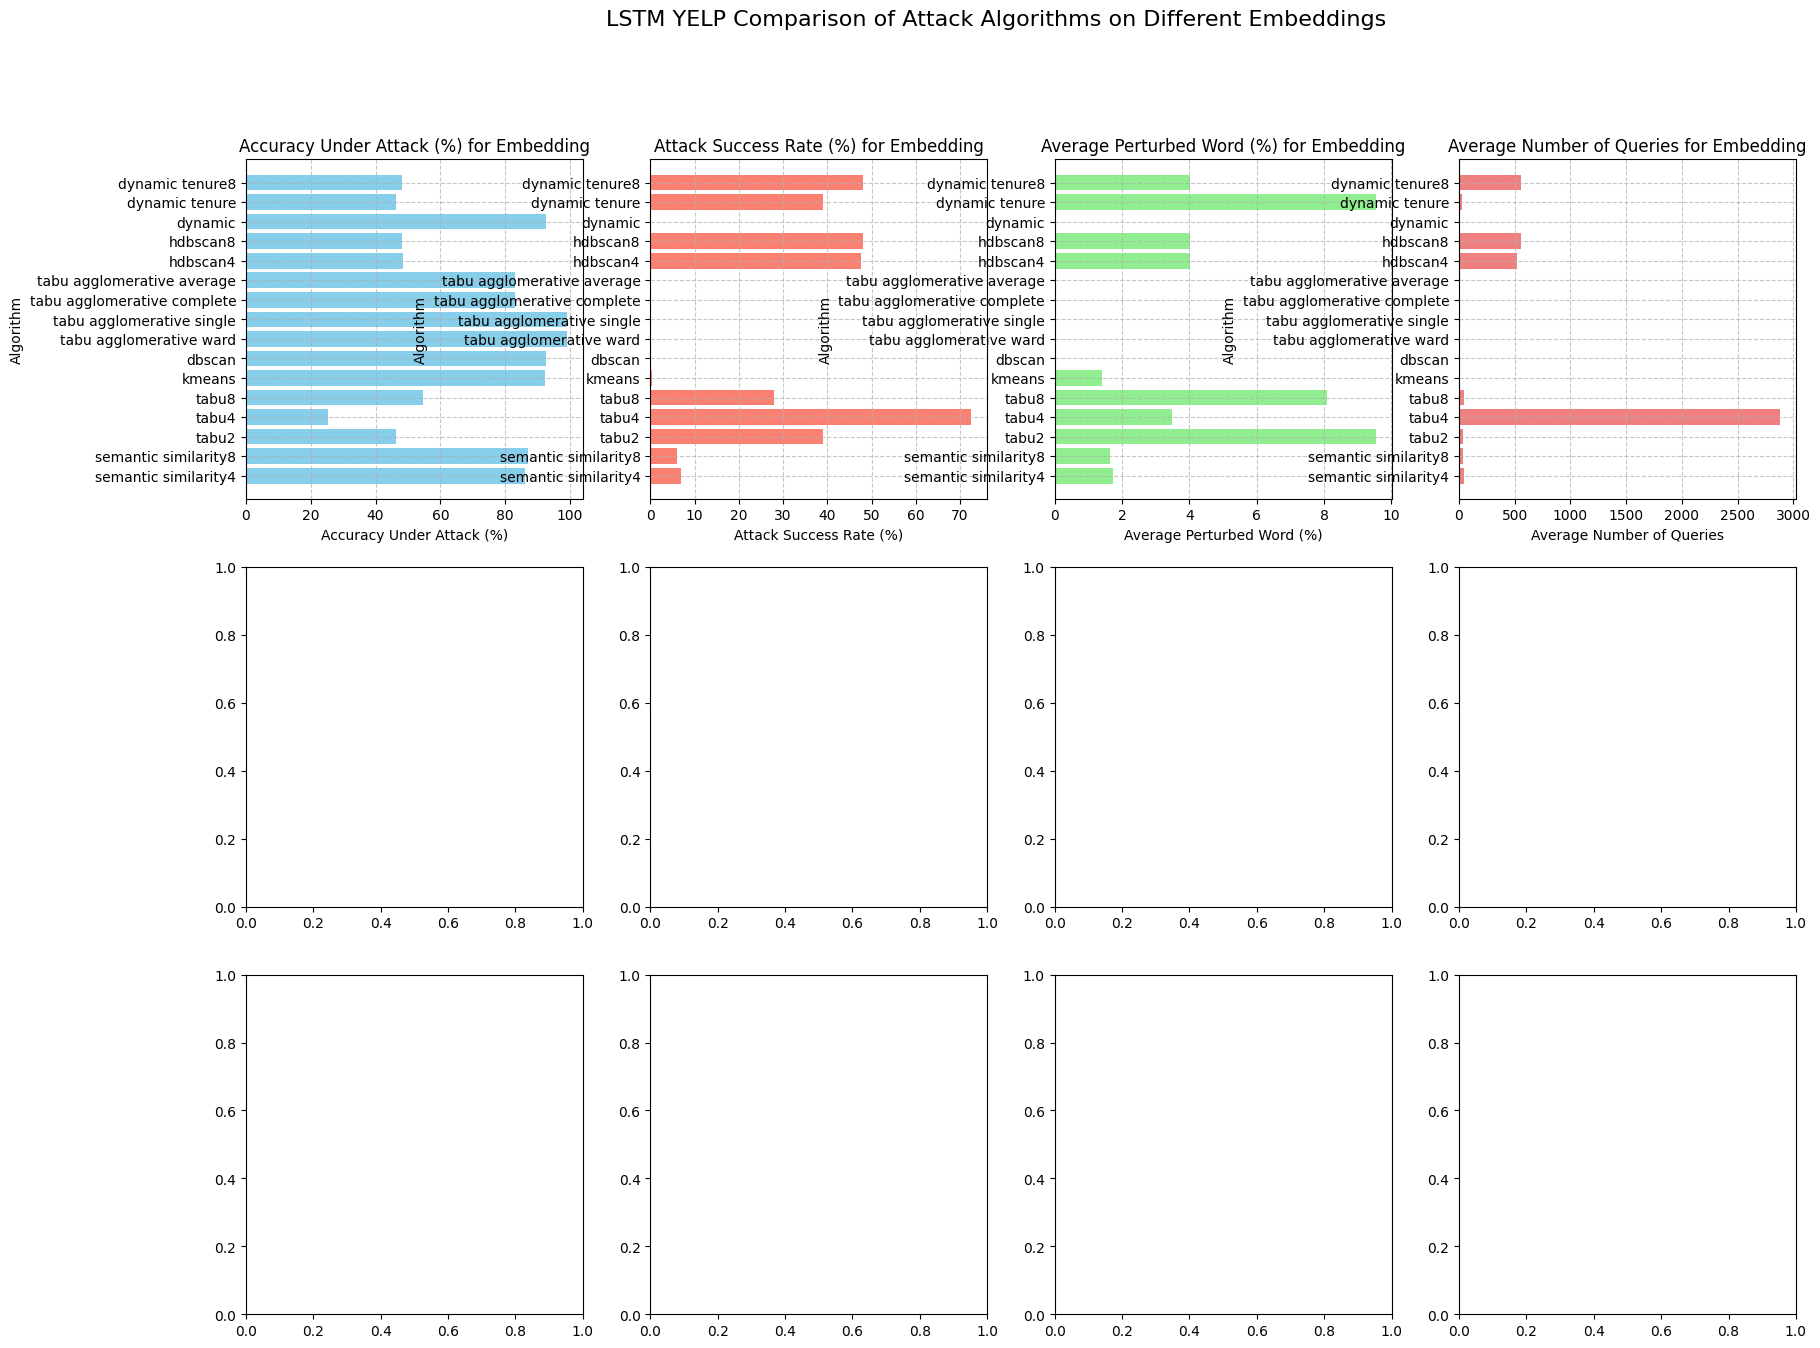

In [21]:
import csv
import os
import matplotlib.pyplot as plt

# Create a directory to save the plots
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)

# Function to save plot
def save_plot(fig, filename):
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, bbox_inches='tight')
    plt.close(fig)

# Function to process each CSV file
def process_csv(file_path):
    data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            data.append(row)

    # Extract relevant data for plotting
    algorithms = [row[0] for row in data[2:]]  # Skip headers and descriptions
    accuracy_under_attack = [float(row[5].strip('%')) for row in data[2:]]
    attack_success_rate = [float(row[6].strip('%')) for row in data[2:]]
    average_perturbed_word = [float(row[7].strip('%')) for row in data[2:]]
    average_num_queries = [float(row[9]) for row in data[2:]]

    return algorithms, accuracy_under_attack, attack_success_rate, average_perturbed_word, average_num_queries

# Walk through the directory and process each CSV file
root_dir = '/home/heliya/Desktop/TextAttack-Search-Benchmark/res_csv'
embeddings = ['Embedding', 'Hownet', 'Wordnet']

for model in ['bert_mr', 'bert_yelp', 'lstm_mr', 'lstm_yelp']:
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    fig.suptitle(f'{model.replace("_", " ").upper()} Comparison of Attack Algorithms on Different Embeddings', fontsize=16)

    for i, embedding in enumerate(embeddings):
        for j, metric in enumerate(['accuracy_under_attack', 'attack_success_rate', 'average_perturbed_word', 'average_num_queries']):
            csv_file = f'Textattack ({model.replace("_", " ").upper()}), {embedding}.csv'
            file_path = os.path.join(root_dir, model, csv_file)
            algorithms, accuracy_under_attack, attack_success_rate, average_perturbed_word, average_num_queries = process_csv(file_path)

            data = {
                'accuracy_under_attack': accuracy_under_attack,
                'attack_success_rate': attack_success_rate,
                'average_perturbed_word': average_perturbed_word,
                'average_num_queries': average_num_queries
            }

            colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']
            titles = ['Accuracy Under Attack (%)', 'Attack Success Rate (%)', 'Average Perturbed Word (%)', 'Average Number of Queries']

            ax = axes[i, j]
            ax.barh(algorithms, data[metric], color=colors[j])
            ax.set_xlabel(titles[j])
            ax.set_ylabel('Algorithm')
            ax.set_title(f'{titles[j]} for {embedding}')
            ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    save_plot(fig, f'{model}_comparison_plots.png')
